In [1]:
import re # regular expressions
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# for each author extract
# name
# number of documents
# h-index

In [3]:
# because working with the large file is difficult
# create a small file that is easier to read
# for example
# grep -B4 -A4 Allesina scopus.html > small.html

In [4]:
# Step 1: read the whole file
with open('scopus.html', 'r') as content_file:
    content = content_file.read()

In [5]:
# Step 2: Extracting names
# Note that the names reported as:
"""title="View this author&#39;s profile"> Allesina, Stefano</a>"""

'title="View this author&#39;s profile"> Allesina, Stefano</a>'

In [6]:
names = re.findall(r'title="View this author&#39;s profile"> (.*)</a>', content)

In [7]:
names[:10]

['Nakamura, Yusuke',
 'Müller, Dietrich R.',
 'Weichselbaum, Ralph R.',
 'Roizman, Bernard',
 'Ratain, Mark J.',
 'Larson, Richard A.',
 'Bell, Graeme I.',
 'Hubbell, Jeffrey A.',
 'Doi, Kunio',
 'Olopade, Olufunmilayo I.']

In [8]:
# make sure we have 2000 names
len(names)

2000

In [9]:
# Step 3: Extracting number of documents
# Similarly, we have strings like
"""title="View documents for this author">
88
</a>"""
# reporting the number of documents
# we use the same strategy
# note we need to add .*? in front of (\d+) 
# as some numbers are misformatted

'title="View documents for this author">\n88\n</a>'

In [10]:
documents = re.findall(r'title="View documents for this author">\n?.*?(\d+)\s?\n?</a>', content)

In [11]:
documents[:10]

['1422', '924', '759', '567', '529', '526', '525', '514', '486', '469']

In [12]:
# make sure there are 2000 values
len(documents)

2000

In [13]:
# Step 4: extracting h-index
# the pattern is 
"""
<td class="dataCol4 alignRight">
33
"""

'\n<td class="dataCol4 alignRight">\n33\n'

In [14]:
hindex = re.findall(r'<td class="dataCol4 alignRight">\n(\d+)\n', content)

In [15]:
hindex[:10]

['148', '90', '104', '100', '77', '116', '120', '110', '73', '84']

In [16]:
len(hindex)

2000

In [17]:
# now make documents and hindex integers for computing
documents = [int(x) for x in documents] # list comprehension
hindex = [int(x) for x in hindex] 

In [18]:
# some stats
print("documents: max", max(documents), 
      "min", min(documents), 
      "mean", sum(documents) / len(documents))

documents: max 1422 min 20 mean 72.032


In [19]:
print("hindex: max", max(hindex), 
      "min", min(hindex), 
      "mean", sum(hindex) / len(hindex))

hindex: max 148 min 0 mean 22.499


In [20]:
def scatter_plot(x, y, label = 'my plot'):
    plt.plot(x, y, 'o', c = 'g')
    plt.title(label)
    plt.show()

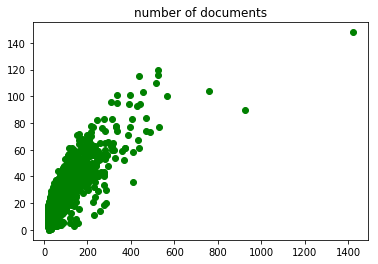

In [32]:
scatter_plot(documents, hindex, "number of documents")

In [33]:
# try with logarithm
import math
logdoc = [math.log(x) for x in documents]

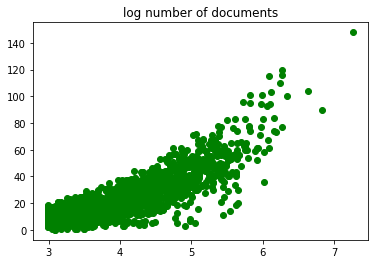

In [34]:
scatter_plot(logdoc, hindex, "log number of documents")

In [35]:
# try with sqrt
sqrtdoc = [math.sqrt(x) for x in documents]

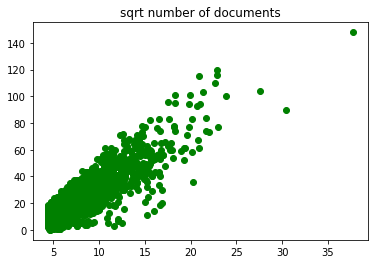

In [36]:
scatter_plot(sqrtdoc, hindex, "sqrt number of documents")

In [37]:
# compute correlation between
# number of docs and h-index
# log(number of docs) and h-index
# sqrt(number of docs) and h-index

In [38]:
def compute_pearson_correlation(x, y):
    meanx = sum(x) / len(x)
    sdx = math.sqrt(sum([(a - meanx) ** 2 for a in x]) / len(x))
    meany = sum(y) / len(y)
    sdy = math.sqrt(sum([(a - meany) ** 2 for a in y]) / len(y))
    # now compute mean(x y)
    xy = x
    for i in range(len(x)):
        xy[i] = xy[i] * y[i]
    # correlation:
    # (E[x y] - E[x] E[y]) / (sd[x] sd[y])
    meanxy = sum(xy) / len(xy)
    return (meanxy - meanx * meany)/ (sdx * sdy)

In [39]:
compute_pearson_correlation(sqrtdoc, hindex)

0.8637968816539302